<a href="https://colab.research.google.com/github/hashaski/Data-Base-Regressao-Linear/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas e a base de dados que será usada.

**A base de dados usada é sobre o preço de casas sobre da área, nos Estados Unidos.**

Housing Prices Dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [123]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/hashaski/Data-Base-Regressao-Linear/main/Housing.csv"

dataframe = pd.read_csv(url)

dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Parte feita usando fórmulas dadas na aula de Análise de Dados.

Separei as colunas "price" e "area" em duas variáveis, para ser mais fácil de manuseá-las.

In [124]:
price = dataframe.price

area = dataframe.area

Criei uma simples função de média, pois é necessário para calcular a regressão linear.

In [125]:
def media_manual(list):
  return sum(list) / len(list)

A partir da média, é possível descobrir a regressão linear.

In [126]:
def regressao_linear(df_Y,df_X):
    l = len(df_Y)

    #A

    mediaX = media_manual(df_X)
    mediaY = media_manual(df_Y)

    soma1 = 0
    soma2 = 0
    for i in range(l):
        mx = df_X[i] - mediaX
        my = df_Y[i] - mediaY
        mxy = (mx*my)
        soma1 = soma1 + mxy
        mx2 = (df_X[i] - mediaX)**2
        soma2 = soma2 + mx2
    return_A = soma1/soma2


    #B

    return_B = mediaY - mediaX * return_A

    #Y

    return_Y = return_A * mediaX + return_B

    #Retorno

    sair = False
    lista_retorno = []
    while not sair:
        lista_retorno.append(return_A)
        lista_retorno.append(return_B)
        lista_retorno.append(return_Y) #coeficiente
        return lista_retorno
        sair = True

Foi criado um gráfico subplots que irá ser usado para comparar com a regressão linear.

<function matplotlib.pyplot.show(*args, **kw)>

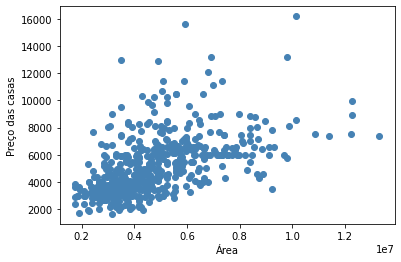

In [127]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(
    price,
    area,
    c='steelblue')
plt.xlabel("Área")
plt.ylabel("Preço das casas")
plt.show

E por fim, a regressão linear feita usando cálculo das variáveis manualmente.

<function matplotlib.pyplot.show(*args, **kw)>

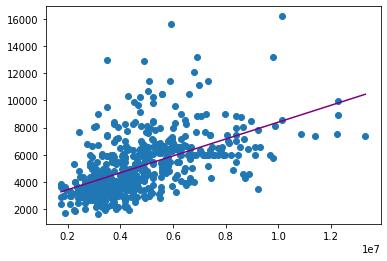

In [128]:
x = np.array(price)
z = np.array(area)
plt.scatter(x,z,)
m, b = np.polyfit(x,z,1)

plt.plot(x,m*x+b,c = 'purple')
plt.show

## Parte feita usando bibliotecas que foram importadas.

 Iremos olhar apenas para o preço (price) e a área do lote das casas (area) e fazer a regressão linear.

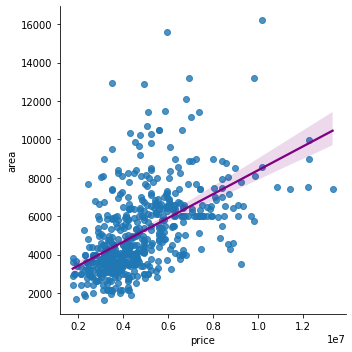

In [129]:
sns.lmplot(x='price',y='area',
           data=dataframe, line_kws={'color': 'purple'})

Foi preciso limpar a base de dados para ter apenas o preço e a área.

In [130]:
df_limpa = dataframe[['price','area']]

df_limpa

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


Com a base de dados limpa, foi possível fazer os gráficos representando as varíaveis.

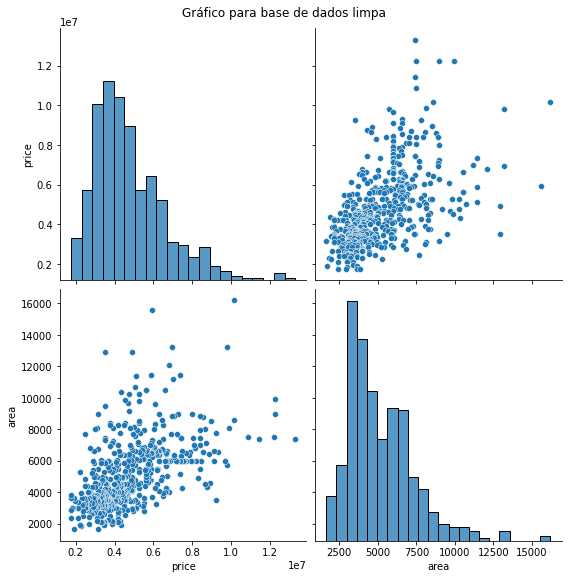

In [131]:
x = sns.pairplot(df_limpa,aspect=1,height=4).fig.suptitle('Gráfico para base de dados limpa',y=1)